# Task
Plot all `.gpx` files inside `/content/` on top of an OSM map using `contextily`, with no axis labels or title.

## Install libraries

### Subtask:
Install `geopandas`, `contextily`, and `gpxpy` for geospatial data handling, basemaps, and GPX parsing.


**Reasoning**:
Install the necessary libraries for geospatial data handling, basemaps, and GPX parsing.



In [1]:
%pip install geopandas contextily gpxpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 105.5 MB/s eta 0:00:00


## Load and process gpx files

### Subtask:
Read all GPX files in `/content/`, extract latitude and longitude, and combine them into a single GeoDataFrame.


**Reasoning**:
Read all GPX files, extract latitude and longitude, and combine them into a single GeoDataFrame as instructed.



In [2]:
import os
import gpxpy
import geopandas as gpd
import pandas as pd

# Get a list of all .gpx files
gpx_files = [f for f in os.listdir('/content/') if f.endswith('.gpx')]

# Initialize an empty list to store data points
data_points = []

# Iterate through each GPX file
for gpx_file in gpx_files:
    with open(os.path.join('/content/', gpx_file), 'r') as f:
        gpx = gpxpy.parse(f)

        # Iterate through tracks and segments
        for track in gpx.tracks:
            for segment in track.segments:
                # Extract latitude and longitude for each point
                for point in segment.points:
                    data_points.append({'latitude': point.latitude, 'longitude': point.longitude})

# Convert the list of data points into a pandas DataFrame
df = pd.DataFrame(data_points)

# Convert the DataFrame into a GeoDataFrame
gdf_combined = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
)

display(gdf_combined.head())

,latitude,longitude,geometry
0,20.263987,105.967745,POINT (105.96775 20.26399)
1,20.263984,105.967748,POINT (105.96775 20.26398)
2,20.263983,105.967748,POINT (105.96775 20.26398)
3,20.263983,105.967748,POINT (105.96775 20.26398)
4,20.263983,105.967747,POINT (105.96775 20.26398)


## Reproject data

### Subtask:
Reproject the GeoDataFrame to a Web Mercator projection (EPSG:3857) to align with the basemap.


**Reasoning**:
Reproject the combined GeoDataFrame to Web Mercator (EPSG:3857) and display the head to confirm the coordinate system change.



In [3]:
gdf_reprojected = gdf_combined.to_crs(epsg=3857)
display(gdf_reprojected.head())

,latitude,longitude,geometry
0,20.263987,105.967745,POINT (11796275.468 2304330.165)
1,20.263984,105.967748,POINT (11796275.785 2304329.777)
2,20.263983,105.967748,POINT (11796275.729 2304329.668)
3,20.263983,105.967748,POINT (11796275.701 2304329.678)
4,20.263983,105.967747,POINT (11796275.645 2304329.698)


## Visualize data

### Subtask:
Plot the GeoDataFrame on top of an OSM basemap using `contextily`, ensuring no axis labels or title are displayed.


**Reasoning**:
Import contextily and plot the reprojected data on an OSM basemap without axis labels or title.



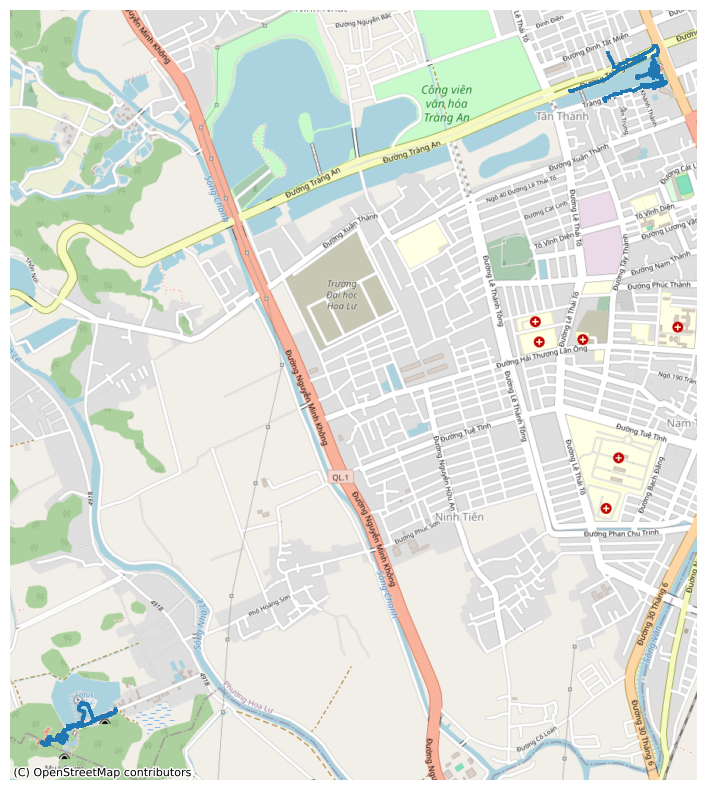

In [4]:
import contextily as cx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
gdf_reprojected.plot(ax=ax, markersize=1)
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)
ax.set_axis_off()
plt.show()

## Summary:

### Data Analysis Key Findings

*   All GPX files in the `/content/` directory were successfully read and processed.
*   Latitude and longitude data from all GPX tracks were extracted and combined into a single GeoDataFrame.
*   The combined GeoDataFrame was successfully reprojected from EPSG:4326 to EPSG:3857.
*   The reprojected GPX data was plotted on an OpenStreetMap basemap using `contextily`.
*   The plot was generated without axis labels or a title, as requested.

### Insights or Next Steps

*   The current plot shows all GPX tracks combined. Future analysis could involve separating tracks by file or other attributes to analyze individual routes.


# Task
Plot all ".gpx" files inside "/content/" on 3 different graphs using `contextily` to overlay on top of an OSM map, with no labels on the axis and no title.

## Load and process gpx files

### Subtask:
Read all GPX files in `/content/`, extract latitude and longitude, and create a list of GeoDataFrames, one for each GPX file.


**Reasoning**:
Read all GPX files, extract latitude and longitude, and create a list of GeoDataFrames as instructed.



In [5]:
# Get a list of all .gpx files
gpx_files = [f for f in os.listdir('/content/') if f.endswith('.gpx')]

# Initialize an empty list to store individual GeoDataFrames
gdf_list = []

# Iterate through each GPX file
for gpx_file in gpx_files:
    data_points = []
    with open(os.path.join('/content/', gpx_file), 'r') as f:
        gpx = gpxpy.parse(f)

        # Iterate through tracks and segments
        for track in gpx.tracks:
            for segment in track.segments:
                # Extract latitude and longitude for each point
                for point in segment.points:
                    data_points.append({'latitude': point.latitude, 'longitude': point.longitude})

    # Convert the list of data points into a pandas DataFrame
    df = pd.DataFrame(data_points)

    # Convert the DataFrame into a GeoDataFrame
    gdf = gpd.GeoDataFrame(
        df, geometry=gpd.points_from_xy(df.longitude, df.latitude), crs="EPSG:4326"
    )

    # Append the GeoDataFrame to the list
    gdf_list.append(gdf)

# Display the head of the first GeoDataFrame in the list
display(gdf_list[0].head())

,latitude,longitude,geometry
0,20.263987,105.967745,POINT (105.96775 20.26399)
1,20.263984,105.967748,POINT (105.96775 20.26398)
2,20.263983,105.967748,POINT (105.96775 20.26398)
3,20.263983,105.967748,POINT (105.96775 20.26398)
4,20.263983,105.967747,POINT (105.96775 20.26398)


## Reproject data

### Subtask:
Reproject each GeoDataFrame in the list to a Web Mercator projection (EPSG:3857) to align with the basemap.


**Reasoning**:
Initialize an empty list, iterate through the list of GeoDataFrames, reproject each one to EPSG:3857, append to the new list, and display the head of the first reprojected GeoDataFrame.



In [6]:
gdf_reprojected_list = []

for gdf in gdf_list:
    gdf_reprojected = gdf.to_crs(epsg=3857)
    gdf_reprojected_list.append(gdf_reprojected)

display(gdf_reprojected_list[0].head())

,latitude,longitude,geometry
0,20.263987,105.967745,POINT (11796275.468 2304330.165)
1,20.263984,105.967748,POINT (11796275.785 2304329.777)
2,20.263983,105.967748,POINT (11796275.729 2304329.668)
3,20.263983,105.967748,POINT (11796275.701 2304329.678)
4,20.263983,105.967747,POINT (11796275.645 2304329.698)


## Visualize data

### Subtask:
Iterate through the list of reprojected GeoDataFrames and plot each one on a separate figure on top of an OSM basemap using `contextily`, ensuring no axis labels or title are displayed for each plot.


**Reasoning**:
Iterate through the list of reprojected GeoDataFrames and plot each one on a separate figure on top of an OSM basemap using contextily, ensuring no axis labels or title are displayed for each plot.



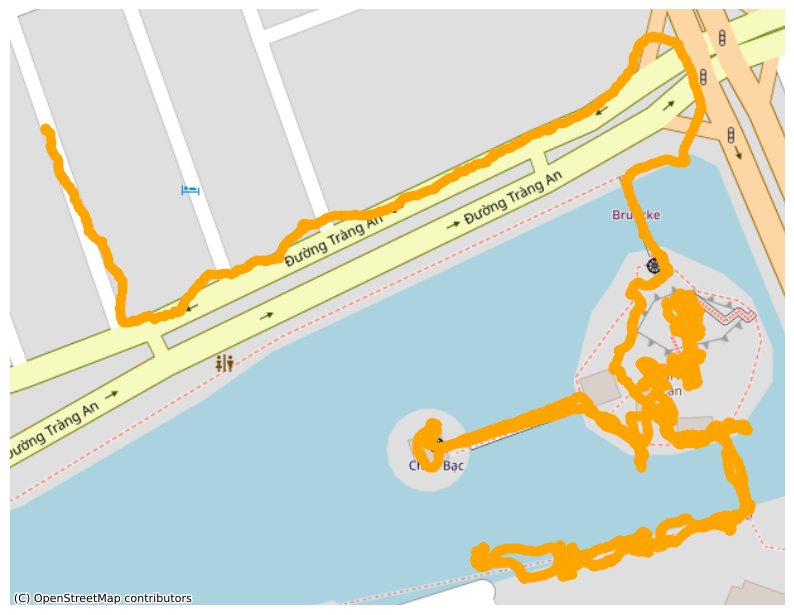

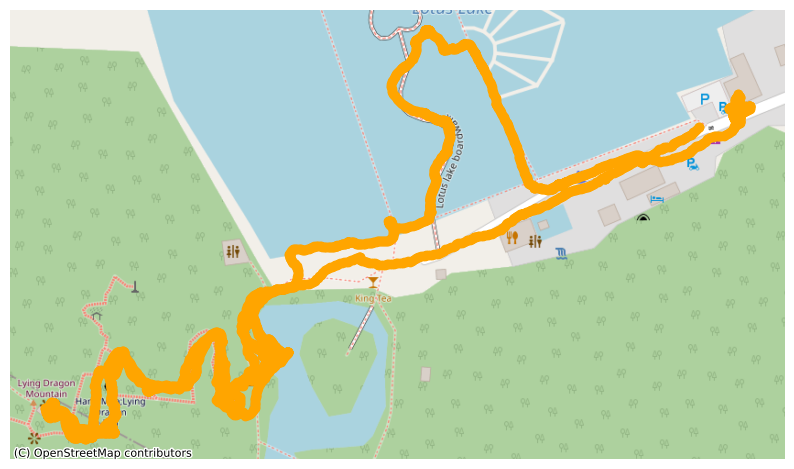

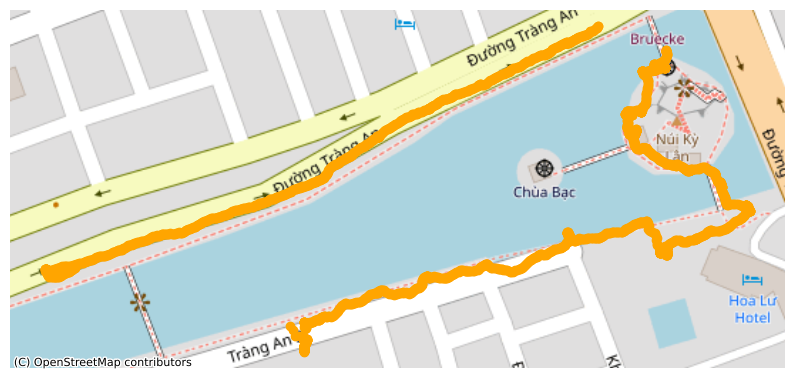

In [11]:
import matplotlib.pyplot as plt
import contextily as cx

for gdf_reprojected in gdf_reprojected_list:
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot with thick orange lines
    gdf_reprojected.plot(ax=ax, color='orange', linewidth=1)

    # Add basemap
    cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

    # Clean up the plot
    ax.set_axis_off()
    plt.show()


## Summary:

### Data Analysis Key Findings

* The process successfully read all GPX files in the `/content/` directory, extracted latitude and longitude data, and created a separate GeoDataFrame for each file, stored in a list.
* Each GeoDataFrame was successfully reprojected to the Web Mercator projection (EPSG:3857).
* The reprojected GPX tracks were successfully plotted on separate figures with an OpenStreetMap basemap using `contextily`.
* Axis labels were successfully removed from each plot.

### Insights or Next Steps

* The process successfully generated three separate maps, each displaying a different GPX track overlaid on an OSM basemap as requested.
* The resulting plots are suitable for visualization without geographical grid lines or labels.
